# <center> Estructuras de Datos</center>
## <center> Universidad Nacional de Tres de Febrero</center>
## <center>Guía de ejercicios 5</center>

### Recuperación de la información: Índice invertido y árboles B

#### Ejercicio 1: Escribir una función que reciba una lista de documentos y devuelva el índice invertido corresponidente. Los documentos de entrada los recibe en un diccionario con la siguiente estructura (todas las palabras se deben pasar a minúsculas antes de indexarlas):


In [ ]:
documentos = {"doc1": "La casa esta ordenada y organizada",\
              "doc2": "Maria se casa el dia de mañana",\
              "doc3": "Maria es muy ordenada y Marta muy organizada",\
              "doc4": "mañana sera un gran dia para visitar a Maria y a Marcela y dejar todo ordenado"}

def indice_invertido(docs):
    '''Recibe un diccionario con documentos, donde la clave es el 
    nombre del documento y el valor el contenido y crea un índice 
    invertido. Devuelve un diccionario, donde las claves son las 
    palabras de los textos y los valores son conjuntos de documentos
    que contienen esas palabras
    '''
    pass

dicc=indice_invertido(documentos)
print(dicc)

#### Ejercicio 2: Resolver puntualmente las siguientes consultas booleanas, utilizando el índice invertido del ejercicio anterior:
1. día and mañana
2. (maría or día) and not (ordenada)
3. (casa and not maría) or (mañana and not maría)
4. (casa or mañana) and not María

In [ ]:
#1
print("{: <50} {:}".format("1: dia and mañana:", ))
#2
print("{: <50} {:}".format("2: (maría or dia) and not (ordenada):",))
#3
print("{: <50} {:}".format("3: (casa and not maría) or (mañana and not maria):",))
#4
print("{: <50} {:}".format("4: (casa or mañana) and not maria:",))


#### Ejercicio 3: Escribir una función que reciba una lista de documentos, donde los documentos son nombres de archivos de texto (path completo) y calcule el índice invertido correspondiente. Calcular el índice invertido de los cuentos de Tolkien, considerando los siguientes documentos:
1. Introduccion.txt
2. Bombadil.txt
3. Egidio.txt
4. Niggle.txt
5. Roverandom.txt
6. Wootton.txt

La función pedida no debe considerar stop words, no debe distinguir entre mayúsculas y minúsculas, no debe indexar palabras con menos de 3 caracteres, se deben reemplazar las vocales acentuadas, eliminar espacios que sobren y signos de puntuación.

In [1]:
import string
#Lista de Stop Words en español
# http://snowball.tartarus.org/algorithms/spanish/stop.txt
_STOP_WORDS = frozenset(['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los',
'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'es',
'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'fue', 'este', 'ha', 'sí',
'porque', 'esta', 'son', 'entre', 'está', 'cuando', 'muy', 'sin', 'sobre',
'ser', 'tiene', 'también', 'me', 'hasta', 'hay', 'donde', 'han', 'quien',
'están', 'estado', 'desde', 'todo', 'nos', 'durante', 'estados', 'todos',
'uno', 'les', 'ni', 'contra', 'otros', 'fueron', 'ese', 'eso', 'había',
'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo',
'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes',
'nada', 'muchos', 'cual', 'sea', 'poco', 'ella', 'estar', 'haber', 'estas',
'estaba', 'estamos', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te',
'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío',
'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya',
'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro',
'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está',
'estamos', 'estáis', 'están', 'esté', 'estés', 'estemos', 'estéis', 'estén',
'estaré', 'estarás', 'estará', 'estaremos', 'estaréis', 'estarán', 'estaría',
'estarías', 'estaríamos', 'estaríais', 'estarían', 'estaba', 'estabas',
'estábamos', 'estabais', 'estaban', 'estuve', 'estuviste', 'estuvo',
'estuvimos', 'estuvisteis', 'estuvieron', 'estuviera', 'estuvieras',
'estuviéramos', 'estuvierais', 'estuvieran', 'estuviese', 'estuvieses',
'estuviésemos', 'estuvieseis', 'estuviesen', 'estando', 'estado', 'estada',
'estados', 'estadas', 'estad', 'he', 'has', 'ha', 'hemos', 'habéis', 'han',
'haya', 'hayas', 'hayamos', 'hayáis', 'hayan', 'habré', 'habrás', 'habrá',
'habremos', 'habréis', 'habrán', 'habría', 'habrías', 'habríamos', 'habríais',
'habrían', 'había', 'habías', 'habíamos', 'habíais', 'habían', 'hube',
'hubiste', 'hubo', 'hubimos', 'hubisteis', 'hubieron', 'hubiera', 'hubieras',
'hubiéramos', 'hubierais', 'hubieran', 'hubiese', 'hubieses', 'hubiésemos',
'hubieseis', 'hubiesen', 'habiendo', 'habido', 'habida', 'habidos', 'habidas',
'soy', 'eres', 'es', 'somos', 'sois', 'son', 'sea', 'seas', 'seamos', 'seáis',
'sean', 'seré', 'serás', 'será', 'seremos', 'seréis', 'serán', 'sería',
'serías', 'seríamos', 'seríais', 'serían', 'era', 'eras', 'éramos', 'erais',
'eran', 'fui', 'fuiste', 'fue', 'fuimos', 'fuisteis', 'fueron', 'fuera',
'fueras', 'fuéramos', 'fuerais', 'fueran', 'fuese', 'fueses', 'fuésemos',
'fueseis', 'fuesen', 'siendo', 'sido', 'sed', 'tengo', 'tienes', 'tiene',
'tenemos', 'tenéis', 'tienen', 'tenga', 'tengas', 'tengamos', 'tengáis',
'tengan', 'tendré', 'tendrás', 'tendrá', 'tendremos', 'tendréis', 'tendrán',
'tendría', 'tendrías', 'tendríamos', 'tendríais', 'tendrían', 'tenía',
'tenías', 'teníamos', 'teníais', 'tenían', 'tuve', 'tuviste', 'tuvo',
'tuvimos', 'tuvisteis', 'tuvieron', 'tuviera', 'tuvieras', 'tuviéramos',
'tuvierais', 'tuvieran', 'tuviese', 'tuvieses', 'tuviésemos', 'tuvieseis',
'tuviesen', 'teniendo', 'tenido', 'tenida', 'tenidos', 'tenidas', 'tened', ''])

def acondicionar_palabra(pal):
    '''Reemplaza vocales acentuadas, elimina espacios sobrantes y 
    signos de puntuación
    '''
    pass

def ii_agregar_archivo(dicc, archivo):
    '''Agrega las palabras del archivo al indice invertido dicc
    archivo es el path completo al archivo, el archivo tiene extensión .txt
    '''
    pass
    
def ii_crear(archivos):
    '''Recibe una lista con archivos (path completos) a procesar
    y devuelve un diccionario con el índice invertido
    '''
    pass
        
archivos=["Introduccion.txt","Bombadil.txt","Egidio.txt","Niggle.txt","Roverandom.txt","Wootton.txt"]   
ii=ii_crear(archivos)



#### Ejercicio 4: Completar el código a continuación para poder hacer consultas interactivas al índice invertido

In [ ]:
def consultar(indice_invertido):
    '''Realiza consultas al indice_invertido, en caso de consultar por una única palabra
    devuelve los documentos en los que aparece, y en en caso de consultar por varias palabras 
    (separadas por blancos) busca alguna de las palabras (OR) y todas las palabras (AND)
    '''
    while True:
        op = input("\nIntroduce tu búsqueda(Enter para finalizar):\n>>> ")
        if len(op) == 0: break
        busq = op.split()
        if len(busq) == 1: #op es una sola palabra
            pass
        elif len(busq) > 1:
            print("\nDocumentos en donde aparece al menos una palabra buscada (OR)\n")
            pass
            print("\nDocumentos en donde aparecen todas las palabras buscadas (AND)\n")
            pass

        
consultar(ii)

#### Ejercicio 4: Agregar un stemmer a los ejercicios anteriores. Por ejemplo se puede utilizar PyStemmer (https://github.com/snowballstem/pystemmer) que es parte de Snowball (http://snowballstem.org/).


#### Ejercicio 5: Insertar en un árbol B, inicialmente vacío y de orden 3 las claves A,B,G,H,K,M,R,W,Z. Mostrar paso a paso:
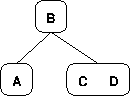

#### Ejercicio 6: Escribir una función que reciba un índice invertido, construido sobre diccionarios de python (con hashes) y devuelva un índice invertido sobre un diccionario con árboles B como estructura de base. (Instalar el módulo BTrees: pip install BTrees).

In [ ]:
from BTrees.OOBTree import OOBTree
def convertir_indice_invertido(ii):
    '''Recibe un índice invertido sobre un diccionario nativo de python
    y devuelve el mismo índice invertido sobre un diccionario con árboles B
    '''
    pass

dicc=convertir_indice_invertido(ii)
if list(dicc.keys())==sorted(list(dicc.keys())):
    print("Las claves están ordenadas")

#### Ejercicio 7: Escribir una función que permita realizar búsquedas con el comodín * por ejemplo:
1. ma*
2. \*a
3. ma\*a

In [ ]:
alfabeto='abcdefghijklmnñopqrstuvwxyz'

def indice_invertido_reverso(ii):
    '''Crea un índice invertido con todas las palabras claves escritas al revés
    se utiliza para buscar como el comodín * al principio de la palabra
    '''
    pass
    


def busq_comodin(texto):
    '''Permite realizar búsquedas con el comodín * en el índice invertido
    dicc creado en el ejercicio 6. El comodín puede aparecer una única vez
    al inicio del texto, al final o al medio. Acepta también una palabra 
    sin el comodín
    '''
    print("Búsqueda:", texto)
    if texto.find("*") == -1: #palabra sin comodin
        pass
    elif texto[-1]=="*": #comodín al final
        pass
    elif texto[0]=="*": #comodin al inicio
        pass
    else: #comodín al medio de la palabra
        pass
        
dicc_reverso=indice_invertido_reverso(dicc)        
def main():
    
    while True:
        op=input("Ingrese una palabra a buscar, se puede usar *, enter para finalizar: ")
        if len(op) == 0: break
        op=op.lower()
        busq_comodin(op)

main()